Colab link: https://colab.research.google.com/drive/1Rkc1NnCUs3Lg7OzNhF1eH05BQr_Y4rMd?usp=sharing

# Scientific context of the problem

High-energy physics, and more particularly the particle physics field, aims at establishing the elementary constituents of matter. This is usually achieved through protons and antiprotons collisions experiments in circular or linear accelerators to produce new, or "exotic" particles. The low ratio of creation of these new particles ($300$ for $10^{11}$ collisions in the case of the Higgs Boson for instance), and their quick decay into a different particle make their detection a very non-trivial task.

In this sense, and given the limited amount of data together with their expensive nature (both in terms of money and time), it is crucial to detect accurately true detections from noisy, background ones.

To this end, machine learning algorithms have been shown useful during the past decade and this notebook aims at developping and analysing some ML approaches to solve this binary (or two-class) classification problem.

**Reference**: this problem is based on [Baldi et al., Searching for exotic particles in high-energy physics with deep learning, Nature, 2014](https://www.nature.com/articles/ncomms5308).

# The data

In this problem, we consider a subset of the [SUSY](https://archive.ics.uci.edu/dataset/279/susy#) dataset (you don't need to download it). It consists in Monte-Carlo simulated data aiming at benchmarking algorithms to differentiate between collisions creating symmetric (exotic) particles and collisions creating standard model particles.

The data are arranged in 8 features representing kinematic properties measured by the accelerator sensors. Based on these features, the aim is to implement and compare several machine learning models.

1. What is the machine learning family this problem is about? What is the nature of the input data?

2. Enumerate some methods that could be used for such a task.

# Prerequisites

3. Import the necessary packages, in particular, we will use:
> * [`matplotlib`](https://matplotlib.org/) for data visualisation and plots,
> * [`numpy`](https://numpy.org/) for standard numerical operations and algebra,
> * [`pandas`](https://pandas.pydata.org/) for data analysis,
> * [`scikit-learn`](https://scikit-learn.org/stable/) for ML algorithms and related functions used for model selection or data pre-processing.

In [2]:
import pandas                       # For data management
import matplotlib.pyplot as plt     # For plotting
import matplotlib as mpl            # For plotting setup
import numpy as np                  # For numerical calculations
import sklearn                      # Machine learning library
from sklearn import model_selection

# Formatting the plots
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'normal'
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.formatter.limits'] = (-6, 6)
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

4. To download the subset of the SUSY dataset we'll use in this notebook, you can download it using the following code, or by downloading it from [my Github](https://github.com/tbonnair/Machine-Learning-Principles-with-Applications-in-Physics). The filename is `SUSY_subset_f1.csv.zip` that you'll have to unzip.

In [3]:
!git clone https://github.com/tbonnair/Machine-Learning-Principles-with-Applications-in-Physics.git/
!unzip -q  'Machine-Learning-Principles-with-Applications-in-Physics/Hands-on/data/SUSY_subset_f1.csv.zip'

Cloning into 'Machine-Learning-Principles-with-Applications-in-Physics'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 6), reused 37 (delta 4), pack-reused 0
Receiving objects: 100% (45/45), 36.27 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (6/6), done.


# Loading, exploring, and preparing the data

5. Load the data using the `pandas` dataset.

In [4]:
datapath = 'SUSY_subset_f1.csv'
dataset = pandas.read_csv(datapath)

6. Explore the data (how many events are there, what are the features, etc.) using the `pandas` library. What is the name of the key we want to predict? To access a given key (column), you can use `dataset['keyname']`.

In [5]:
dataset.head(5)

,isTrueDetection,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   isTrueDetection            100000 non-null  float64
 1    lepton  1 pT              100000 non-null  float64
 2    lepton  1 eta             100000 non-null  float64
 3    lepton  1 phi             100000 non-null  float64
 4    lepton  2 pT              100000 non-null  float64
 5    lepton  2 eta             100000 non-null  float64
 6    lepton  2 phi             100000 non-null  float64
 7    missing energy magnitude  100000 non-null  float64
 8    missing energy phi        100000 non-null  float64
dtypes: float64(9)
memory usage: 6.9 MB


7. Check the proportion of events in the two classes.

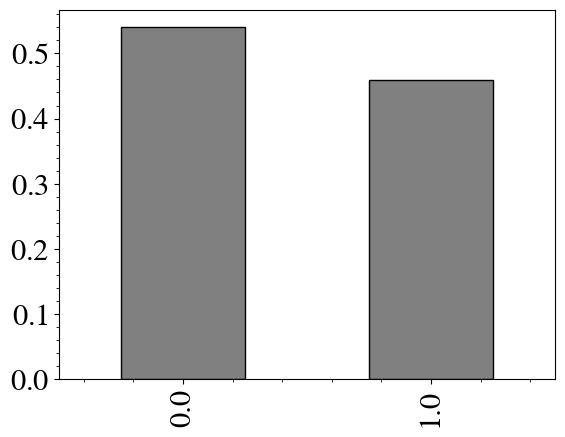

In [7]:
# @title
dataset["isTrueDetection"].value_counts(normalize=True).plot.bar(fc='grey', ec='k')
plt.show()

8. Arange the data into a feature matrix $\boldsymbol{X}$ and a target vector $\boldsymbol{y}$. Then, prepare the dataset and split it into 80% training and 20% test using the scikit-learn [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [8]:
# @title
# First let's split the dataset into X and y (matrix and vector) as in the course
labels_features = dataset.keys()[1::]   # Labels of the feature in the dataset
label_pred = dataset.keys()[0]          # Label of the predicition

X = dataset[labels_features]
y = dataset[label_pred]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=102)

print(len(X_train))
print(len(X_test))

80000
20000


# A first model: decision tree

Now the data are ready to be used for training, let us build a first model: a decision tree.

9. Using the scikit-learn documentation, find how to fit a Decision Tree with a maximum depth of 15 and using the entropy loss on the training dataset.

In [ ]:
# @title
from sklearn import tree

DT = tree.DecisionTreeClassifier(max_depth=15, criterion='entropy')
DT.fit(X_train, y_train)

10. Test your model on the test dataset and look at the obtained score.

In [11]:
# @title
y_pred = DT.predict(X_test)
print(DT.score(X_test, y_test))

0.7478


11. Tune the hyperparameter of the maximum depth. To this end, split the training data again into two parts: a training dataset and a validation dataset. Then, find the hyperparameter having the best score on the validation set with depth in the range [1, 20].

100%|██████████| 19/19 [00:23<00:00,  1.22s/it]


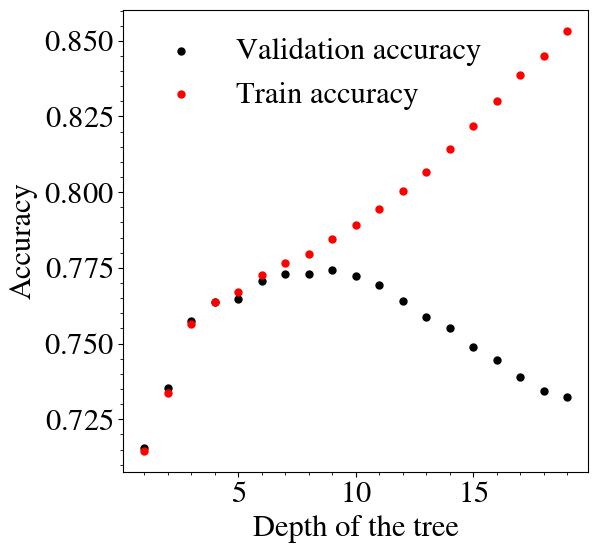

In [12]:
# @title
from tqdm import tqdm   # To show loading bar

X_train2, X_valid, y_train2, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=102)

depths = np.arange(1, 20)

scores_generalization = []
scores_training = []
for d in tqdm(depths):
  DT = tree.DecisionTreeClassifier(max_depth=d, criterion='entropy')
  DT.fit(X_train2, y_train2)
  scores_generalization.append(DT.score(X_valid, y_valid))
  scores_training.append(DT.score(X_train, y_train))

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(depths, scores_generalization, s=25, color='k', label=r'Validation accuracy')
ax.scatter(depths, scores_training, s=25, color='r', label=r'Train accuracy')
ax.set_xlabel(r'Depth of the tree')
ax.set_ylabel(r'Accuracy')
ax.legend(frameon=False)

12. Intepret the evolution of the validation score when varying the maximum depth: how does the validation error behaves and why? (To help you, you can also store and visualise the evolution of the training error in addition to validation error.)

Additional: You can also explore how your decision tree is classifying your data by using the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function from scikit-learn.

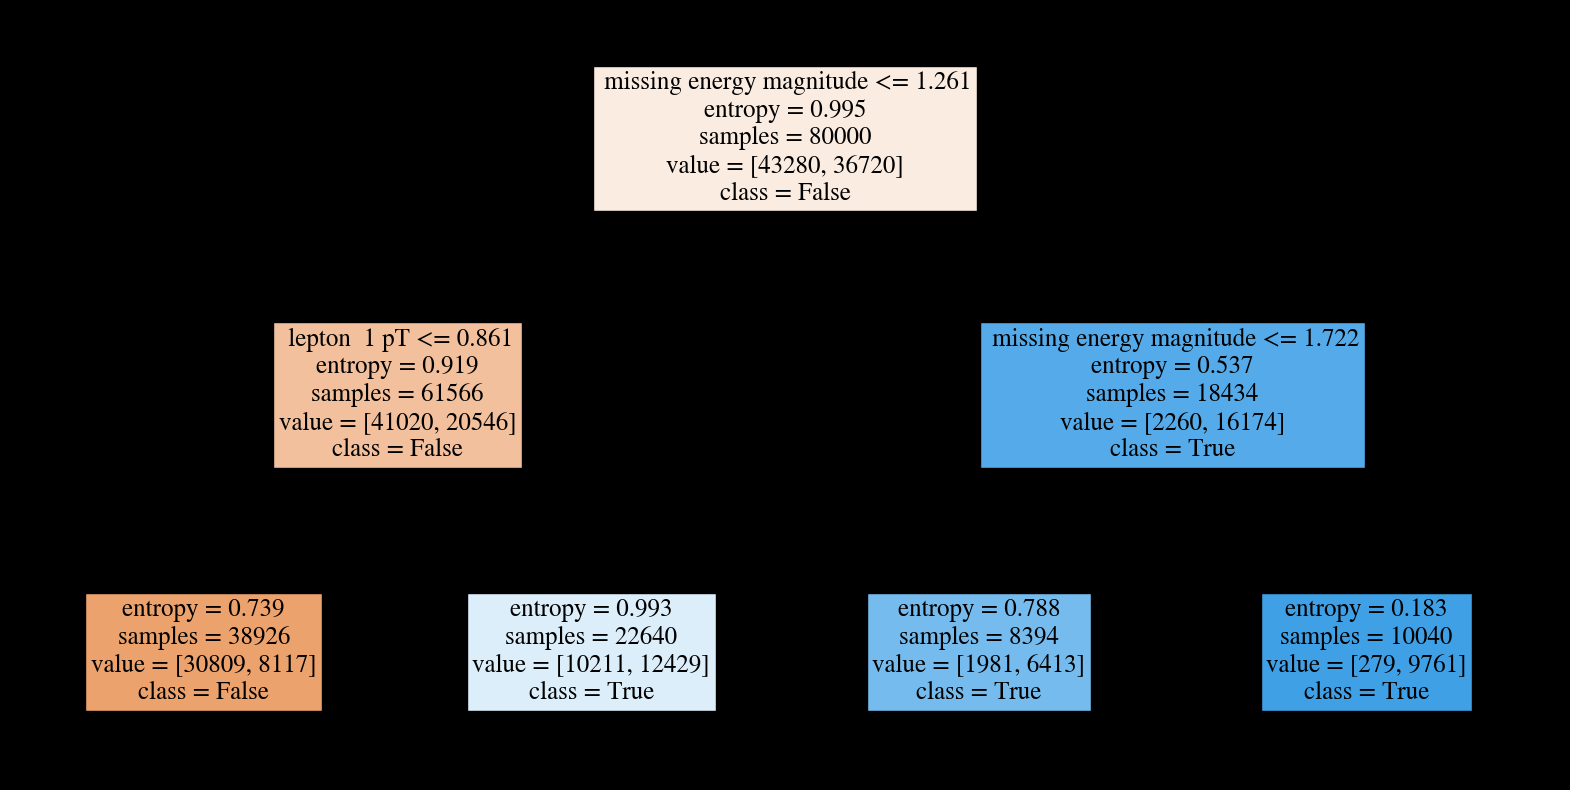

In [13]:
# @title
DT = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
DT.fit(X_train, y_train)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10), facecolor="k")
plot_tree(DT, filled=True, feature_names=labels_features,
          class_names=['False', 'True'], ax=ax, fontsize=18,
)
plt.show()

# Improving the model with more trees: random forest

13. Remind the principle behind random forests.


14. Using the scikit-learn documentation, fit a random forest to the training data with a number of trees of 20 and a maximum depth of 15. Compare this setup with our first decision tree.

In [14]:
# @title
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, max_depth=15, criterion='entropy')

RF.fit(X_train, y_train)

print(RF.score(X_test, y_test))

0.7795


15. Repeat the hyperparameter tuning for tuning the number of trees in [1, 50] at fixed maximum depth = 15 to find the best random forest model for our data.

In [15]:
# @title
from tqdm import tqdm   # To show loading bar

ntrees = [1, 2, 4, 8, 10, 15, 20, 25, 30, 35, 40, 50]
print(ntrees)

scores_generalization_RF = []
scores_training_RF = []
for n in tqdm(ntrees):
  RF_valid = RandomForestClassifier(n_estimators=n, max_depth=15, criterion='entropy')
  RF_valid.fit(X_train2, y_train2)
  scores_generalization_RF.append(RF_valid.score(X_valid, y_valid))
  scores_training_RF.append(RF_valid.score(X_train, y_train))

[1, 2, 4, 8, 10, 15, 20, 25, 30, 35, 40, 50]


100%|██████████| 12/12 [01:00<00:00,  5.03s/it]


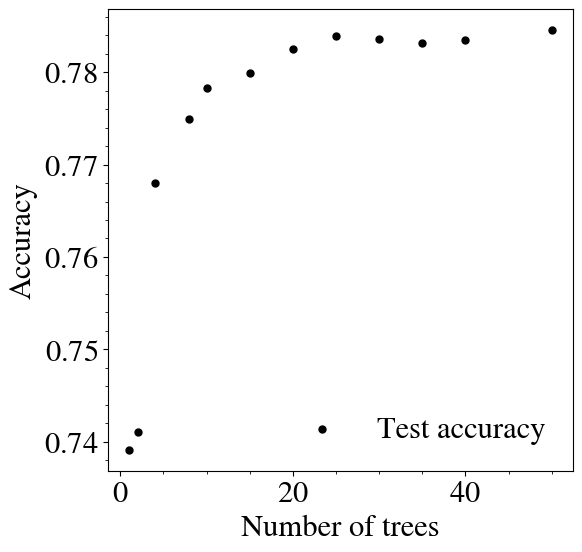

In [ ]:
# @title
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(ntrees, scores_generalization_RF, s=25, color='k', label=r'Test accuracy')
#ax.scatter(ntrees, scores_training_RF, s=25, color='r', label=r'Train accuracy')
ax.set_xlabel(r'Number of trees')
ax.set_ylabel(r'Accuracy')
ax.legend(frameon=False)

16. Does the curve showing the evolution of the test error look the same as previously with the decision tree depth? Why?

# Importance of hand-crafted features

For such models that do not learn new features from the data, hand-crafted can matter a lot for the performance.
This is in fact what the authors releasing the SUSY dataset did by providing additionally 10 hand-crafted features that are functions of the eight first obtained directly from the sensors.

17. Download the new dataset and explore the new data as before.


In [ ]:
!unzip -q  'Machine-Learning-Principles-with-Applications-in-Physics/Hands-on/data/SUSY_subset2_all_features.csv.zip'
datapath2 = 'SUSY_subset2_all_features.csv'
dataset2 = pandas.read_csv(datapath2)

In [ ]:
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
dtypes: float64(19)
memory usage: 14.5 MB
None


18. Fit a random forest on the full set of features and compare the obtained results with the previous features.

In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier

labels_features = dataset2.keys()[1::]   # Labels of the feature in the dataset
label_pred = dataset2.keys()[0]          # Label of the predicition

X2 = dataset2[labels_features]
y2 = dataset2[label_pred]

X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size=0.2, random_state=102)
RF = RandomForestClassifier(n_estimators=20, max_depth=15, criterion='entropy')

RF.fit(X2_train, y2_train)

print(RF.score(X2_test, y2_test))

80000
20000
0.7919


# Going further (if time)

## Feed-forward neural network
As said before, hand-crafted features can help but require expertise and knowledge to be built. One way to extract interesting features automatically from the first 8 could be to train a feed-forward neural network and see if it can outperform the results of the (already satisfactory) random forest.

To do so, we can use [`PyTorch`](https://pytorch.org/)  and implement a small feed forward neural networks.

19. Import the necessary packages from PyTorch

In [16]:
# @title

# Neural network useful packages from PyTorch and sklearn
import torch
from torch import nn
import torch.optim as optim
from sklearn.utils import shuffle # For shuffling the data

device_cuda = 'cpu'  # We'll use the CPU for the computation

labels_features = dataset.keys()[1::]   # Labels of the feature in the dataset
label_pred = dataset.keys()[0]          # Label of the predicition

X = dataset[labels_features]
y = dataset[label_pred]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=102)

Before doing anything, we need to recast the data into a PyTorch format and standardize them.

In [17]:
# @title
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1,1)

means = X_train_tensor.mean(dim=1, keepdim=True)
stds = X_train_tensor.std(dim=1, keepdim=True)
X_train_tensor = (X_train_tensor - means) / stds

means = X_test_tensor.mean(dim=1, keepdim=True)
stds = X_test_tensor.std(dim=1, keepdim=True)
X_test_tensor = (X_test_tensor - means) / stds

print(f'Mean = {X_train_tensor.mean()}')
print(f'Std = {X_train_tensor.std()}')

Mean = -5.9604643443123e-10
Std = 0.9354150891304016


In PyTorch, a model can be specified as a sequence of several layers. All the possible layers proposed by PyTorch are listed [here](https://pytorch.org/docs/stable/nn.html#linear-layers).

To implement a new model, one needs to create an object `nn.Sequential` and specify the layers successively with their input/output sizes.

20. Specify a network with 3 hidden layers, ReLU activations, and 100 hidden neurons in each hidden layers. The final layer will be of size one with a Sigmoid activation function. To help you, you can draw the diagram of this neural network.

In [18]:
# @title
neural_net = nn.Sequential(
    nn.Linear(8, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 1),
    nn.Sigmoid())

print(neural_net)

Sequential(
  (0): Linear(in_features=8, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=1, bias=True)
  (9): Sigmoid()
)


Note there is a cleaner way of defining the neural network models in PyTorch by defining a subclass of `nn.Module` and creating two functions: an `__init__(self)` function specifying the layers, and a `forward(self)` function specifying how a data is propagating throughout the network. You can have a look at [this link](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

21. Specify a loss function and an optimization procedure. In our case, we'll use the binary cross-entropy loss together with the [`SGD optimizer`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). Set the learning rate to 0.02.

In [19]:
loss_fn = nn.BCELoss()  # binary cross entropy loss function
optimizer = optim.SGD(neural_net.parameters(), lr=0.02)

To train our neural network, we use the backpropagation algorithm and the stochastic gradient descent method.

22. Remind how stochastic gradient descent works.

23. Train the neural network for 20 epochs using a batch size of 20. To do this, you can use two loops, one for the epochs, one for the batches.
To compute and update the gradient, there are four steps:
> * First compute the loss on the batch,
> * Clean your optimizer using the [`optimizer.zero_grad()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html) function,
> * Call the [`backward()`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) function of the loss to compute the gradient,
> * Make a step in the opposite gradient direction using the [`optimizer.step()`](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html) function.

Note: to shuffle the dataset, you can use the [`shuffle`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html) method from scikit-learn.

In [20]:
# @title
n_epochs = 20
batch_size = 32
n_batches = int(len(X_train_tensor) / batch_size)
print(n_batches)

for epoch in range(n_epochs):
    X_shuffled, y_shuffled = shuffle(X_train_tensor, y_train_tensor,
                                     random_state=epoch) # Shuffle the data
    neural_net.train() # Set my model in training mode
    total_loss = 0
    for i in range(0, len(X_shuffled), batch_size):
        Xbatch = X_shuffled[i:i+batch_size]
        y_pred = neural_net(Xbatch)
        ybatch = y_shuffled[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)      # Compute the loss on the batch
        optimizer.zero_grad()               # Set the gradient to zero before backprop
        loss.backward()                     # Perform backpropagation
        optimizer.step()                    # Take one step in the opposite gradient direction
        total_loss += loss / n_batches

    neural_net.eval() # Set my model in evaluation mode
    with torch.no_grad():
        y_pred_test = neural_net(X_test_tensor)

    test_accuracy = (y_test_tensor == y_pred_test.round()).float().mean()
    print(f'Epoch {epoch}, Loss={total_loss}, Test={test_accuracy}')

2500
Epoch 0, Loss=0.6189876198768616, Test=0.7090499997138977
Epoch 1, Loss=0.5374922156333923, Test=0.73294997215271
Epoch 2, Loss=0.5245243906974792, Test=0.7329000234603882
Epoch 3, Loss=0.5196511745452881, Test=0.7412499785423279
Epoch 4, Loss=0.5158249735832214, Test=0.7404500246047974
Epoch 5, Loss=0.5133827328681946, Test=0.7437999844551086
Epoch 6, Loss=0.5108324885368347, Test=0.7454000115394592
Epoch 7, Loss=0.5086381435394287, Test=0.7427999973297119
Epoch 8, Loss=0.5059813261032104, Test=0.7491499781608582
Epoch 9, Loss=0.5049729943275452, Test=0.7488499879837036
Epoch 10, Loss=0.5033283829689026, Test=0.7515000104904175
Epoch 11, Loss=0.501568078994751, Test=0.7462499737739563
Epoch 12, Loss=0.5005075335502625, Test=0.7528499960899353
Epoch 13, Loss=0.4993448257446289, Test=0.7427499890327454
Epoch 14, Loss=0.4983710050582886, Test=0.7551000118255615
Epoch 15, Loss=0.49734634160995483, Test=0.7547000050544739
Epoch 16, Loss=0.49675947427749634, Test=0.751800000667572
Epoc

We see that in 20 epochs with a simple feed-forward neural networks made of 3 hidden layers, we achieve a slightly poorer performance than the random forest applied on the set of basic features.

This shows that the feed-forward neural network needs some fine-tuning to perform better. To explore that, you can play with the code and tune hyperparameters, add fancy tuning like dropping, weight decay, momentum, or regularization.

You can also go and use the full dataset provided in the seminal papers which is in fact made of millions of events, not just $10^5$ that could help your neural network converges to better solutions.

## Randomized search for hyperparameter tuning
In our examples, we always focus on one hyperparameter at a time. In fact, using scikit-learn you can specify several ranges for your hyperparameters and test them randomly to find the association of parameters using randomized search or grid search cross-validation. Randomized search is more efficient numerically but is not leading you to the best possible set of parameters, while grid search consists in an exhaustive search in your pre-defined ranges for parameters. Here we illustrate it with randomized search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# define range of values for each hyperparameter
hyperparameters_range = [{
        "n_estimators": [1, 5, 10, 20, 40],       # Number of trees
        "max_features": [0.5, 1.0, "sqrt", "log2"],  # Proportion of the features used for training you RFs
        "max_depth": [5, 10, 15, 20],  # Maximum depth of the trees trained in RFs
    }]

# Create a base model
RF = RandomForestClassifier(n_estimators=20, max_depth=15, n_jobs=-1)

# Random search with cross validation
RF_CV = RandomizedSearchCV(
    RF, param_distributions=hyperparameters_range, cv=5)

# Fit the search
RF_CV.fit(X_train, y_train)

You can now select the best model and test it.

In [ ]:
print(RF_CV.best_params_)         # Prints the best parameters
RF_best = RF_CV.best_estimator_   # Select the best model
RF_best.score(X_test, y_test)     # Test dataset

{'n_estimators': 40, 'max_features': 'log2', 'max_depth': 10}


0.7802

You could do similarly with the [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function from scikit-learn to perform grid search cross-validation for tuning your hyperparameters.